## Car Price Prediction Model

In [80]:
import numpy as np;
import pandas as pd;
from matplotlib import pyplot as plt;
import seaborn as sns;

import warnings
warnings.filterwarnings('ignore');

In [81]:
df = pd.read_csv('carprice.csv')

In [82]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [83]:
df.shape

(205, 26)

In [84]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [85]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

#### Data Cleaning

In [86]:
df.drop_duplicates(inplace=True)

In [87]:
df.shape

(205, 26)

In [88]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [89]:
df['car_ID'].unique

<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
      ... 
200    201
201    202
202    203
203    204
204    205
Name: car_ID, Length: 205, dtype: int64>

In [90]:
df.drop(['car_ID'],inplace=True,axis=1)

In [91]:
df.shape

(205, 25)

In [92]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [93]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [94]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [95]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [96]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [97]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [98]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [99]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder();

for col in df.columns:
    if(df[col].dtypes == 'object'):
        df[col] = encoder.fit_transform(df[col]);

In [100]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [101]:
#remove outliers

def removeOutliers(df,col):
    q3 = df[col].quantile(0.75);
    q1 = df[col].quantile(0.25);
    iqr = q3 - q1;
    
    max_ = q3 + (iqr * 1.5);
    min_ = q1 - (iqr * 1.5);
    
    df.loc[df[col] >= max_,col] = max_;
    df.loc[df[col] <= min_,col] = min_;


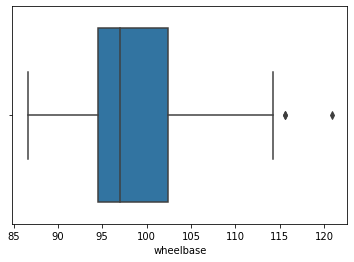

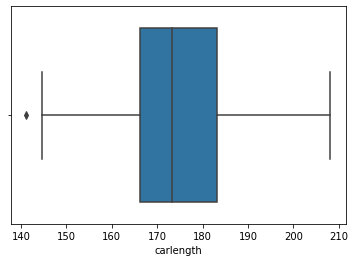

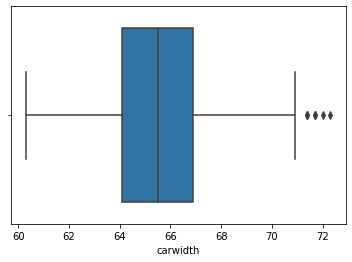

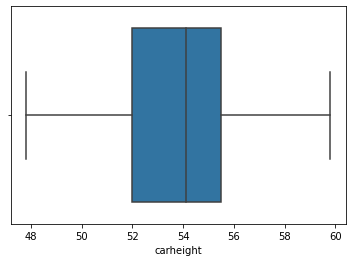

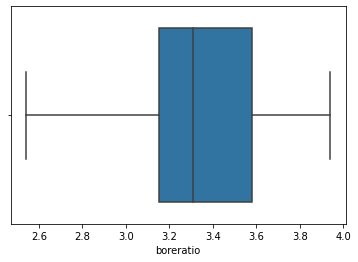

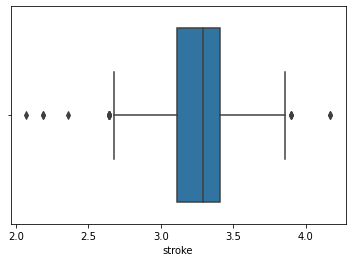

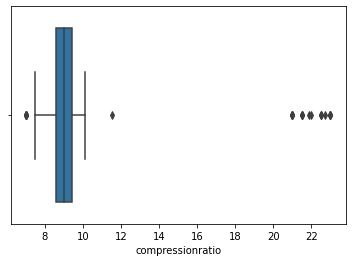

In [102]:
for col in df.columns:
    if(col != 'price' and df[col].dtypes == 'float64'):
        plt.figure();
        sns.boxplot(df[col]);

In [103]:
for col in df.columns:
    if(col != 'price' and df[col].dtypes == 'float64'):
        removeOutliers(df,col);

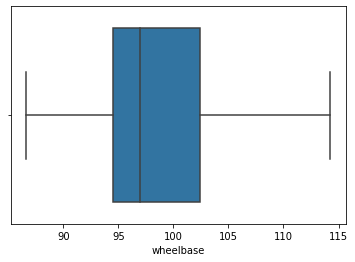

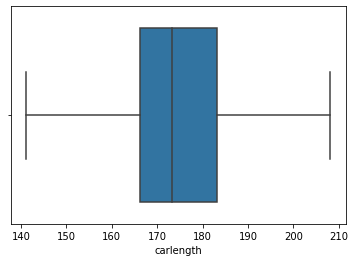

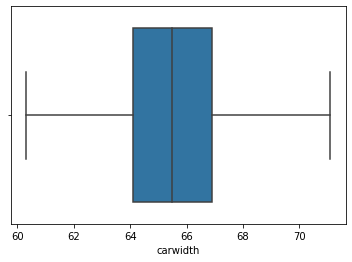

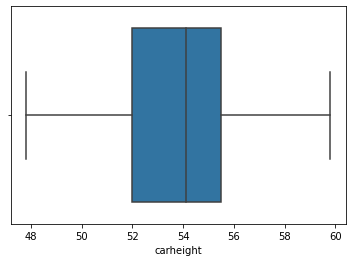

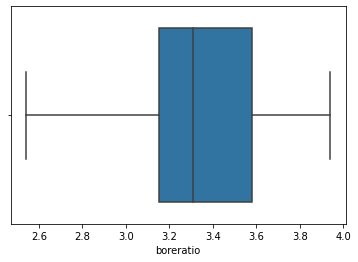

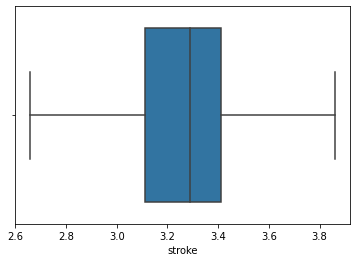

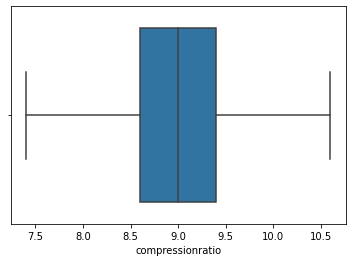

In [104]:
for col in df.columns:
    if(col != 'price' and df[col].dtypes == 'float64'):
        plt.figure();
        sns.boxplot(df[col]);

In [105]:
from sklearn.preprocessing import MinMaxScaler;

scaler = MinMaxScaler();
df_new = df.copy();

for col in df_new.columns:
    if(col != 'price'):
        df_new[col] = scaler.fit_transform(df_new[col].values.reshape(-1,1));

In [106]:
df_new

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.072333,0.413433,...,0.260377,0.714286,0.664286,0.016667,0.50000,0.262500,0.346939,0.222222,0.289474,13495.0
1,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.072333,0.413433,...,0.260377,0.714286,0.664286,0.016667,0.50000,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.285714,0.449254,...,0.343396,0.714286,0.100000,0.675000,0.50000,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.477396,0.529851,...,0.181132,0.714286,0.464286,0.616667,0.81250,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.462929,0.529851,...,0.283019,0.714286,0.464286,0.616667,0.18750,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.952055,1.0,0.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.301887,0.714286,0.885714,0.408333,0.65625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.2,0.945205,1.0,1.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.301887,0.714286,0.885714,0.408333,0.40625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.2,0.958904,1.0,0.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.422642,0.714286,0.742857,0.175000,0.43750,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.2,0.972603,0.0,1.0,0.0,0.75,1.0,0.0,0.813743,0.711940,...,0.316981,0.428571,0.335714,0.616667,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


<AxesSubplot: >

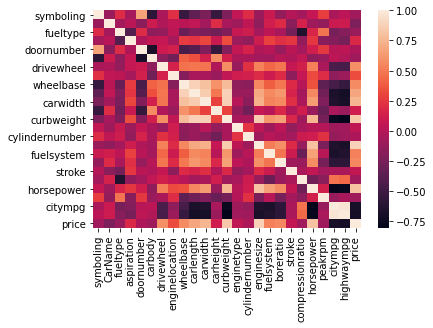

In [107]:
sns.heatmap(df_new.corr())

In [108]:
corr = df_new.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)

In [111]:
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [110]:
corr_df

0
carlength  carwidth    0.847860
           curbweight  0.877728
carwidth   curbweight  0.871963
           price       0.753383
citympg    highwaympg  0.971337
curbweight enginesize  0.850594
           horsepower  0.750739
           price       0.835305
enginesize horsepower  0.809769
           price       0.874145
horsepower price       0.808139
wheelbase  carlength   0.874780
           carwidth    0.798179
           curbweight  0.775265

In [112]:
df_new.drop(['carwidth','highwaympg','curbweight'],axis=1,inplace=True)

In [114]:
corr = df_new.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()
corr_df

0
enginesize horsepower  0.809769
           price       0.874145
horsepower citympg    -0.801456
           price       0.808139
wheelbase  carlength   0.874780

In [115]:
df_new.drop(['horsepower','wheelbase'],axis=1,inplace=True)

In [116]:
corr = df_new.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()
corr_df

,,0
enginesize,price,0.874145


### Modelling

In [117]:
X = df_new.drop(['price'],axis=1);
y = df_new['price'];

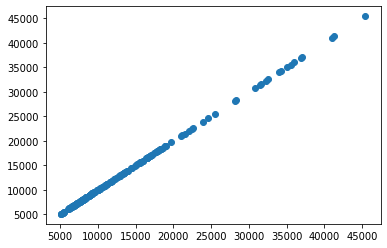

In [122]:
plt.scatter(y,y)

In [123]:
from sklearn.model_selection import train_test_split;

X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,
                                                  train_size=.8);



In [125]:
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_absolute_error;
from sklearn.metrics import mean_squared_error;

def evaluate_model(model):
    y_pred = model.predict(X_test);
    print('R^2 score:', r2_score(y_test,y_pred));
    print('MAE:',mean_absolute_error(y_test,y_pred));
    print('RSME:',np.sqrt(mean_squared_error(y_test,y_pred)));
    
    plt.scatter(y_train, model.predict(X_train),color='g')
    plt.plot(y_pred,y_pred)
    plt.show()
    

R^2 score: 0.8355298706063842
MAE: 2372.127720404887
RSME: 3603.322540230004


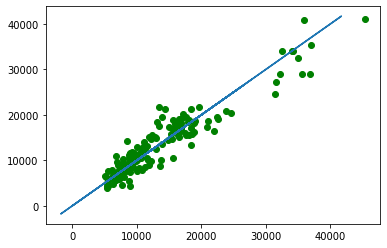

In [126]:
from sklearn.linear_model import LinearRegression;

r = LinearRegression();
r.fit(X_train,y_train);
evaluate_model(r)

R^2 score: 0.9352555389228752
MAE: 1682.1927577086508
RSME: 2260.793685216482


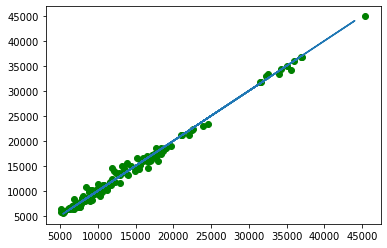

In [127]:
from sklearn.ensemble import GradientBoostingRegressor;

gbr = GradientBoostingRegressor();
gbr.fit(X_train,y_train);
evaluate_model(gbr)

R^2 score: 0.2876888547296571
MAE: 5197.821614091104
RSME: 7498.846973037576


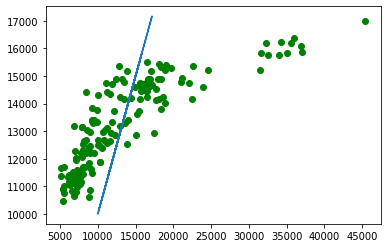

In [129]:
from sklearn.linear_model import ElasticNet;

en = ElasticNet();
en.fit(X_train,y_train);

evaluate_model(en)

R^2 score: 0.8118819158563635
MAE: 2549.7061319005757
RSME: 3853.6733076996084


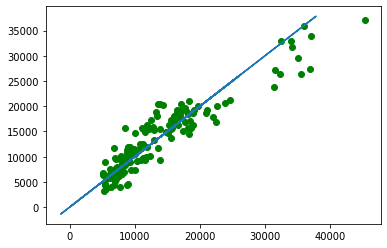

In [130]:
from sklearn.linear_model import SGDRegressor;

sgd = SGDRegressor();
sgd.fit(X_train,y_train)

evaluate_model(sgd)

R^2 score: 0.8315295862182326
MAE: 2368.169431732061
RSME: 3646.8797434508883


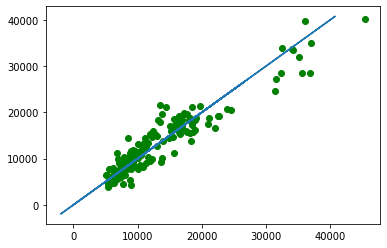

In [131]:
from sklearn.linear_model import BayesianRidge;

br = BayesianRidge();
br.fit(X_train,y_train);

evaluate_model(br)

R^2 score: 0.8107727809734694
MAE: 2576.1114021754984
RSME: 3865.017144830019


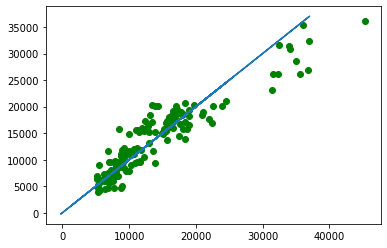

R^2 score: 0.9448170610567265
MAE: 1418.410585175305
RSME: 2087.190236691103


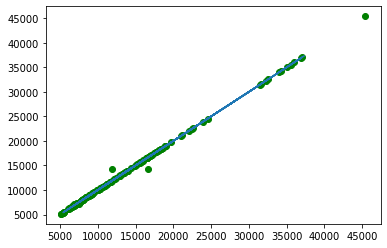

R^2 score: 0.8943210556363225
MAE: 2024.9718978238545
RSME: 2888.376843555276


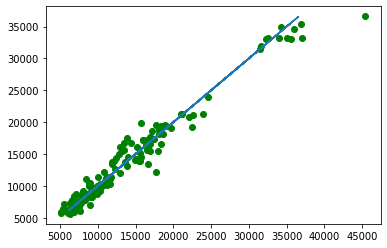

R^2 score: 0.9530671095616372
MAE: 1418.9924715447155
RSME: 1924.8561200019071


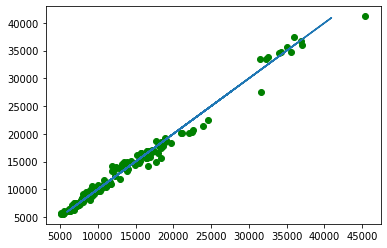

In [141]:
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor;

models = [KernelRidge(),XGBRegressor(),LGBMRegressor(),RandomForestRegressor()];

for model in models:
    model.fit(X_train,y_train);
    evaluate_model(model)

R^2 score: 0.9523625716975264
MAE: 1422.0663739837396
RSME: 1939.2498896644738


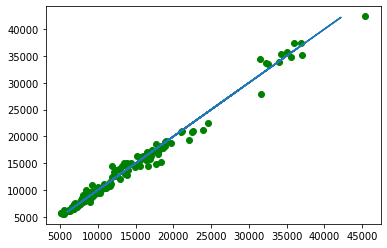

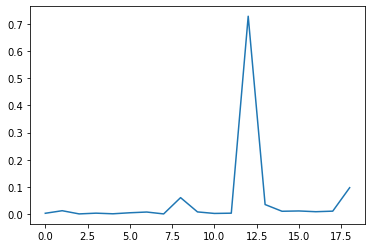

In [146]:
rf = RandomForestRegressor();
rf.fit(X_train,y_train)
evaluate_model(rf);

plt.plot(rf.feature_importances_)

In [147]:
X.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carlength', 'carheight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'citympg'],
      dtype='object')